## <h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Импорт библиотек </h1> 

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.datasets import fetch_california_housing, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


## <h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Дома Бостона </h1> 

### <h1 id="aa" style="color:white;background:#009900;padding:8px;border-radius:8px;font-family:newtimeroman;"> Загрузка данных </h1> 


In [18]:
california_housing = fetch_california_housing()
df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
df['MedHouseVal'] = california_housing.target
df


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [19]:
print("Размер датасета:", df.shape)
print("Пропущенные значения:")
print(df.isnull().sum())


Размер датасета: (20640, 9)
Пропущенные значения:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


### <h1 id="aa" style="color:white;background:#009900;padding:8px;border-radius:8px;font-family:newtimeroman;"> EDA </h1> 


In [20]:
df.describe().T.style.background_gradient(cmap='YlOrRd')


,count,mean,std,min,25%,50%,75%,max
MedInc,20640.000000,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.000000,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.000000,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.000000,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.000000,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.000000,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.000000,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.000000,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.000000,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


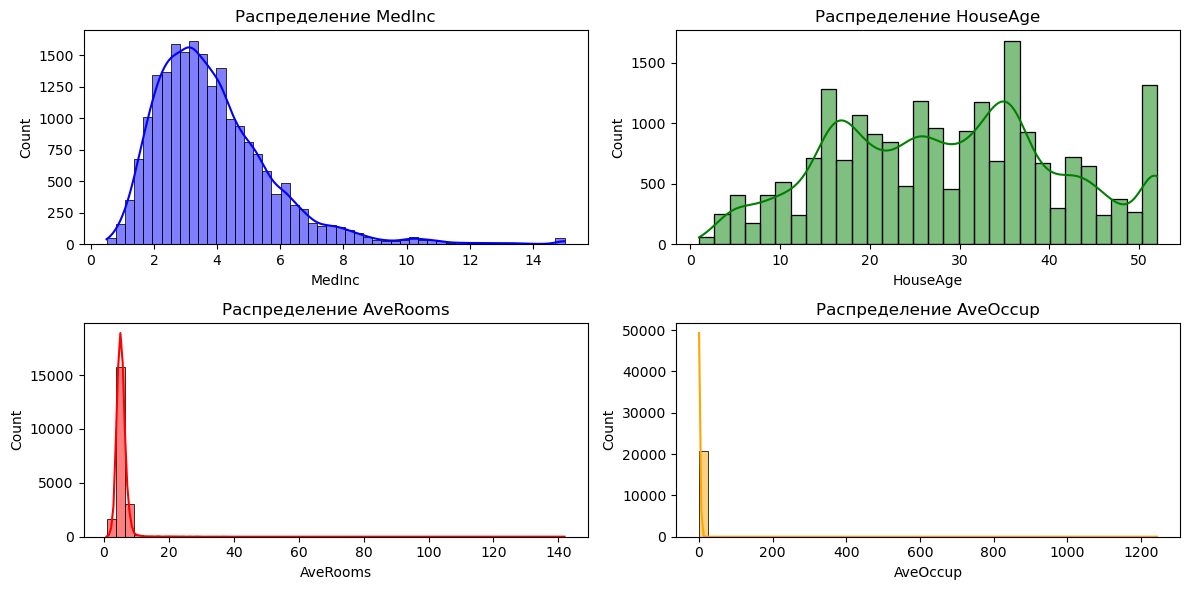

In [21]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['MedInc'], bins=50, kde=True, color='blue')
plt.title('Распределение MedInc')

plt.subplot(2, 2, 2)
sns.histplot(df['HouseAge'], bins=30, kde=True, color='green')
plt.title('Распределение HouseAge')

plt.subplot(2, 2, 3)
sns.histplot(df['AveRooms'], bins=50, kde=True, color='red')
plt.title('Распределение AveRooms')

plt.subplot(2, 2, 4)
sns.histplot(df['AveOccup'], bins=50, kde=True, color='orange')
plt.title('Распределение AveOccup')

plt.tight_layout()
plt.show()


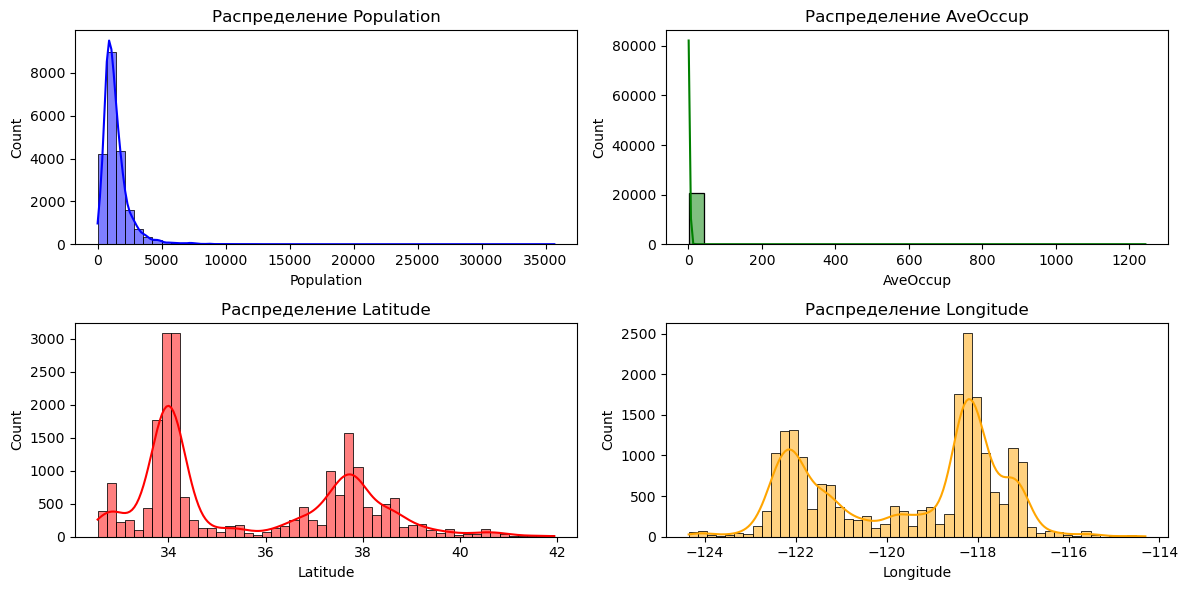

In [22]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['Population'], bins=50, kde=True, color='blue')
plt.title('Распределение Population')

plt.subplot(2, 2, 2)
sns.histplot(df['AveOccup'], bins=30, kde=True, color='green')
plt.title('Распределение AveOccup')

plt.subplot(2, 2, 3)
sns.histplot(df['Latitude'], bins=50, kde=True, color='red')
plt.title('Распределение Latitude')

plt.subplot(2, 2, 4)
sns.histplot(df['Longitude'], bins=50, kde=True, color='orange')
plt.title('Распределение Longitude')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Распределение MedHouseVal')

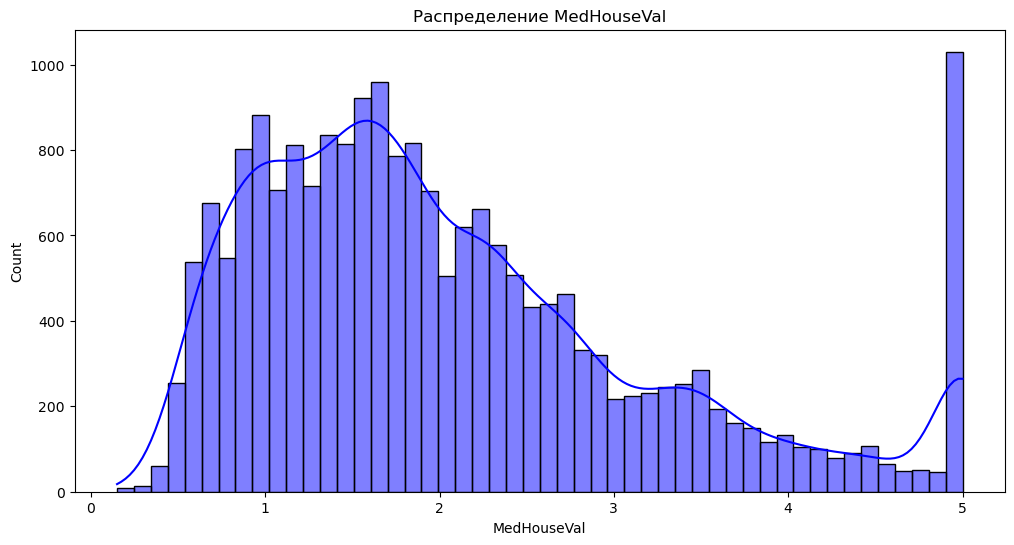

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(df['MedHouseVal'], bins=50, kde=True, color='blue')
plt.title('Распределение MedHouseVal')


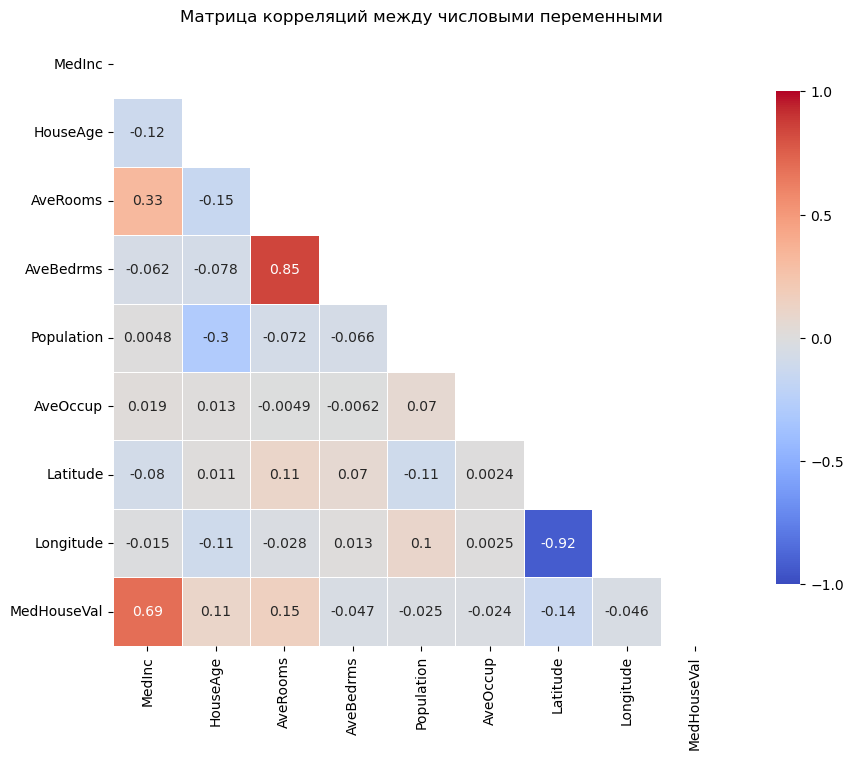

In [24]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0, 
            square=True, linewidths=.5, annot_kws={"size": 10}, 
            cbar_kws={"shrink": 0.8, "orientation": "vertical", "ticks": [-1, -0.5, 0, 0.5, 1]})
plt.title('Матрица корреляций между числовыми переменными')
plt.show()


### <h1 id="aa" style="color:white;background:#009900;padding:8px;border-radius:8px;font-family:newtimeroman;"> Подготовка данных </h1> 


In [25]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### <h1 id="aa" style="color:white;background:#009900;padding:8px;border-radius:8px;font-family:newtimeroman;"> Обучение линейной модели </h1> 


In [26]:
model_all_features = LinearRegression()
model_all_features.fit(X_train, y_train)

y_pred_all_features = model_all_features.predict(X_test)

mse_all = mean_squared_error(y_test, y_pred_all_features)
mae_all = mean_absolute_error(y_test, y_pred_all_features)
r2_all = r2_score(y_test, y_pred_all_features)

print(f'R²: {r2_all:.4f}')
print(f'MSE: {mse_all:.4f}')
print(f'MAE: {mae_all:.4f}')


R² (все признаки): 0.5758
MSE (все признаки): 0.5559
MAE (все признаки): 0.5332


## <h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Цветы ирисов </h1> 

### <h1 id="aa" style="color:white;background:#009900;padding:8px;border-radius:8px;font-family:newtimeroman;"> Загрузка данных </h1> 


In [39]:
iris_dataset = load_iris()
df = pd.DataFrame(data=iris_dataset.data, columns=iris_dataset.feature_names)
df['species'] = pd.Categorical.from_codes(iris_dataset.target, iris_dataset.target_names)
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [40]:
print("Размер датасета:", df.shape)
print("Пропущенные значения:")
print(df.isnull().sum())


Размер датасета: (150, 5)
Пропущенные значения:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


### <h1 id="aa" style="color:white;background:#009900;padding:8px;border-radius:8px;font-family:newtimeroman;"> EDA </h1> 


In [41]:
df.describe().T.style.background_gradient(cmap='YlOrRd')


,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.000000,5.843333,0.828066,4.300000,5.100000,5.800000,6.400000,7.900000
sepal width (cm),150.000000,3.057333,0.435866,2.000000,2.800000,3.000000,3.300000,4.400000
petal length (cm),150.000000,3.758000,1.765298,1.000000,1.600000,4.350000,5.100000,6.900000
petal width (cm),150.000000,1.199333,0.762238,0.100000,0.300000,1.300000,1.800000,2.500000


In [42]:
df['species'].value_counts()


species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

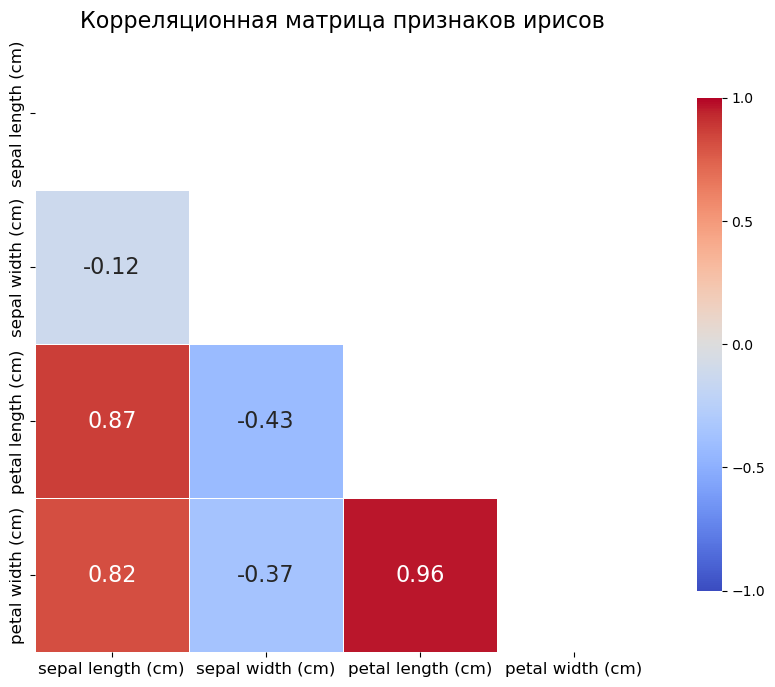

In [43]:
df_copy = df.drop(columns=['species'])

corr = df_copy.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 8))

sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0, 
            square=True, linewidths=.5, annot_kws={"size": 16}, 
            cbar_kws={"shrink": 0.8, "orientation": "vertical", "ticks": [-1, -0.5, 0, 0.5, 1]})

plt.title('Корреляционная матрица признаков ирисов', size=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


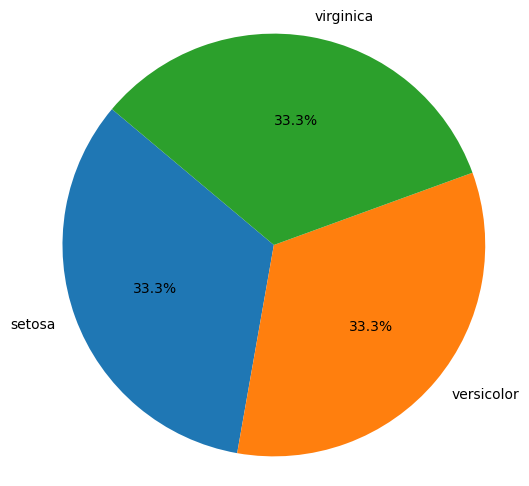

In [44]:
diagnosis_counts = df['species'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(diagnosis_counts, labels=df['species'].unique(), autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.show()


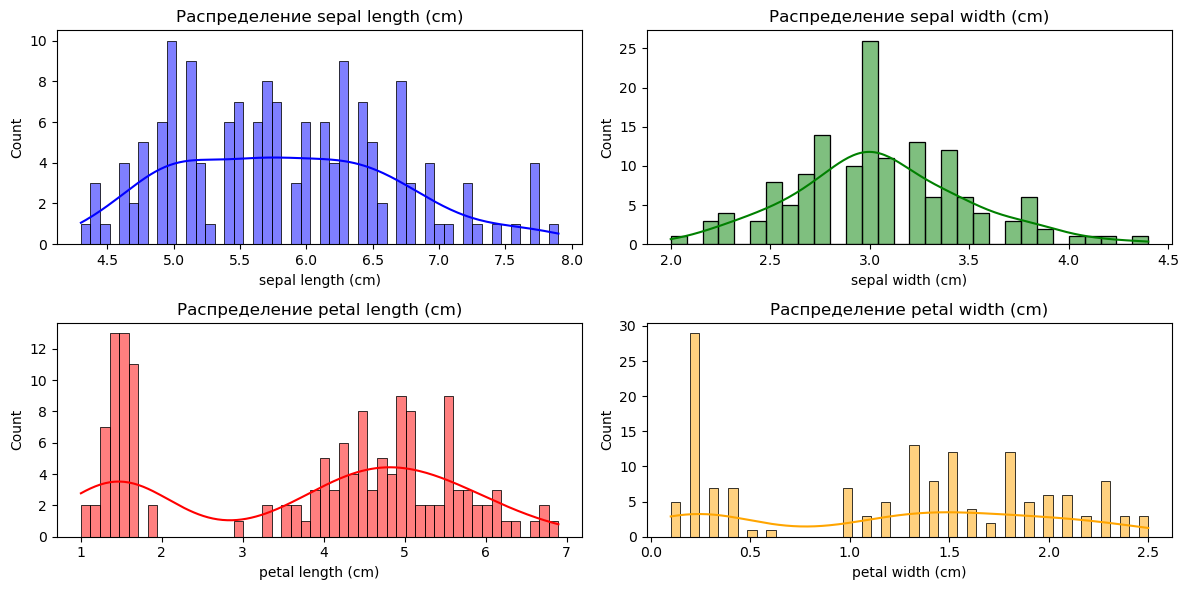

In [45]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['sepal length (cm)'], bins=50, kde=True, color='blue')
plt.title('Распределение sepal length (cm)')

plt.subplot(2, 2, 2)
sns.histplot(df['sepal width (cm)'], bins=30, kde=True, color='green')
plt.title('Распределение sepal width (cm)')

plt.subplot(2, 2, 3)
sns.histplot(df['petal length (cm)'], bins=50, kde=True, color='red')
plt.title('Распределение petal length (cm)')

plt.subplot(2, 2, 4)
sns.histplot(df['petal width (cm)'], bins=50, kde=True, color='orange')
plt.title('Распределение petal width (cm)')

plt.tight_layout()
plt.show()

### <h1 id="aa" style="color:white;background:#009900;padding:8px;border-radius:8px;font-family:newtimeroman;"> Подготовка данных </h1> 


In [46]:
iris = load_iris()
X = iris.data
y = iris.target

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


### <h1 id="aa" style="color:white;background:#009900;padding:8px;border-radius:8px;font-family:newtimeroman;"> Обучение модели логистической регрессии</h1> 


In [47]:
model_l2 = LogisticRegression(penalty='l2', max_iter=1000, random_state=42)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 150]}

grid_search_l2 = GridSearchCV(model_l2, param_grid, cv=5, scoring='accuracy')
grid_search_l2.fit(X_train, y_train)

best_param_l2 = grid_search_l2.best_params_['C']
model_l2_best = grid_search_l2.best_estimator_

train_acc_l2 = accuracy_score(y_train, model_l2_best.predict(X_train))
test_acc_l2 = accuracy_score(y_test, model_l2_best.predict(X_test))

print(f"Логистическая регрессия с L2-регуляризацией (лучшее C={best_param_l2}):")
print(f"Точность на тренировочных данных: {train_acc_l2:.3f}")
print(f"Точность на тестовых данных: {test_acc_l2:.3f}")


Логистическая регрессия с L2-регуляризацией (лучшее C=100):
Точность на тренировочных данных: 0.983
Точность на тестовых данных: 1.000
